Accuracy: 0.925
Confusion Matrix:
 [[ 6  3]
 [ 0 31]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.91      1.00      0.95        31

    accuracy                           0.93        40
   macro avg       0.96      0.83      0.88        40
weighted avg       0.93      0.93      0.92        40



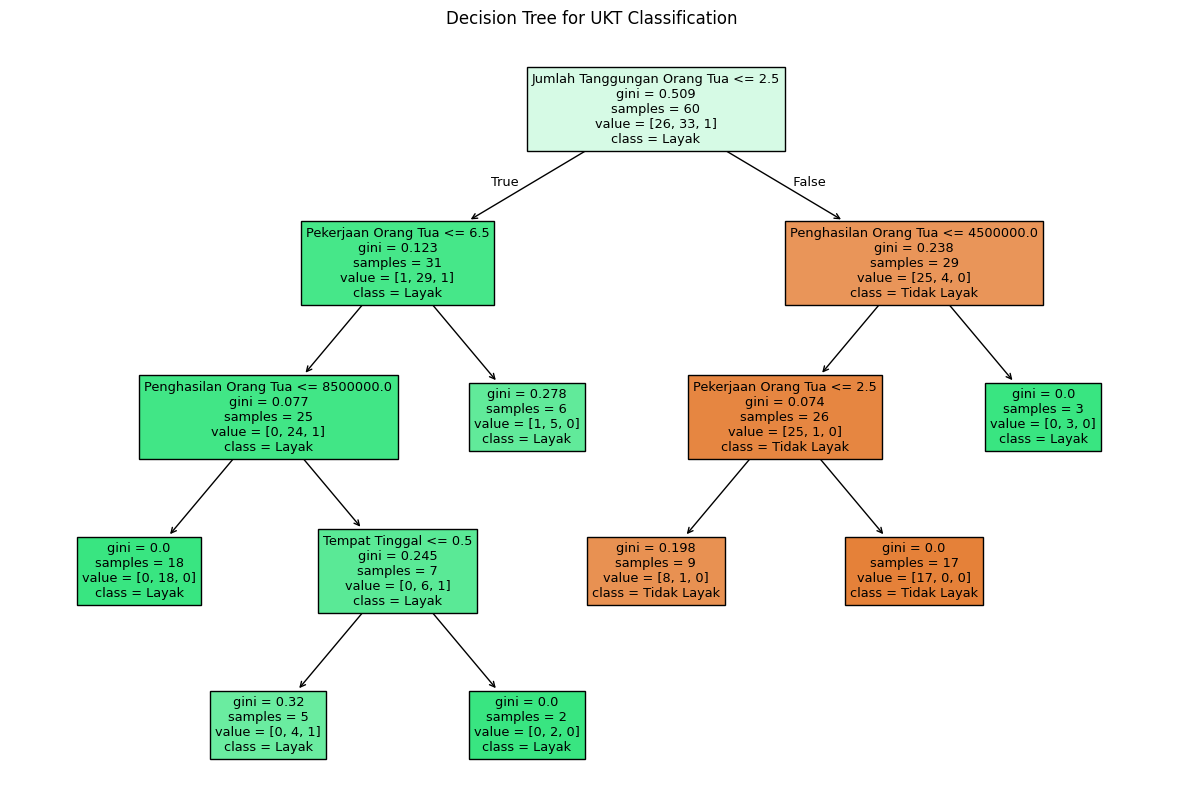

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/UKTMahasiswaDataset.csv')

# Preprocess dataset
# Encode 'Pekerjaan Orang Tua' to numeric values
encoder = LabelEncoder()
data['Pekerjaan Orang Tua'] = encoder.fit_transform(data['Pekerjaan Orang Tua'])

# Separate features and target
X = data.drop(columns=['Kelayakan Keringanan UKT'])
y = encoder.fit_transform(data['Kelayakan Keringanan UKT'])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the Decision Tree classifier
dt_model = DecisionTreeClassifier( max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=["Tidak Layak", "Layak"], filled=True)
plt.title("Decision Tree for UKT Classification")
plt.show()